# Preamble

In [1]:
import numpy as np
import spinmob as s

In [2]:
from sympy import sympify
from scipy.optimize import minimize

Load in data (1=rigel, 2=joseph, 3=miles) and convert inches to cm:

In [5]:
datafilenames = ["calibration_data"+str(i)+".csv" for i in range(1, 4)]
calibration_datas = [s.data.load(datafilename) for datafilename in datafilenames]
added_voltage_error = 0#0.05
inch_to_cm = 2.54
for calibration_data in calibration_datas:
    calibration_data[0] *= inch_to_cm
    calibration_data[2] *= inch_to_cm
    calibration_data[3] += added_voltage_error

Extra ckey: error
Extra ckey: Voltage
Extra ckey: errors
Extra ckey: Height
Extra ckey: error
Extra ckey: Voltage
Extra ckey: errors
Extra ckey: Height
Extra ckey: error
Extra ckey: Voltage
Extra ckey: measurements?)
Extra ckey: bad
Extra ckey: to
Extra ckey: due
Extra ckey: 0.003
Extra ckey: to
Extra ckey: up
Extra ckey: take
Extra ckey: (maybe
Extra ckey: errors
Extra ckey: Height


Convert to relative heights:

In [6]:
for calibration_data in calibration_datas:
    calibration_data[0] -= np.max(calibration_data[0])
    calibration_data[0] *= -1
    calibration_data[2] *= 2

Offset the data for maximal overlap:

In [11]:
second_calibration_offset = -0.0327775555555
third_calibration_offset = -0.0594444444445
calibration_datas[1][0] -= second_calibration_offset
calibration_datas[2][0] -= third_calibration_offset

Chop data so they have some all overlapping:

In [14]:
for calibration_data in calibration_datas:
    max_range = np.argmin(np.abs(calibration_data[0] - 0.45))+1
    for i in range(4):
        calibration_data[i] = calibration_data[i][:max_range]

Generate plots for each:

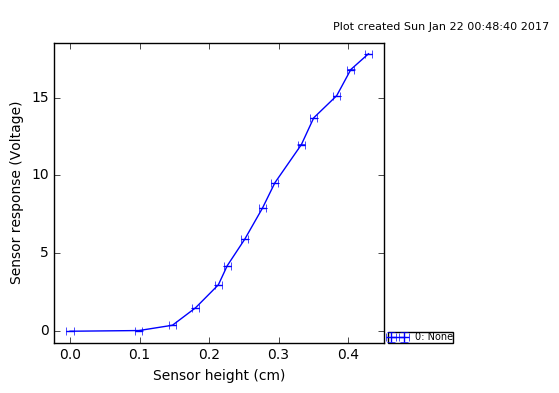

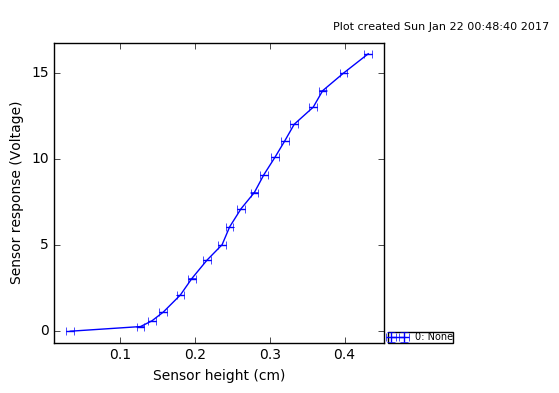

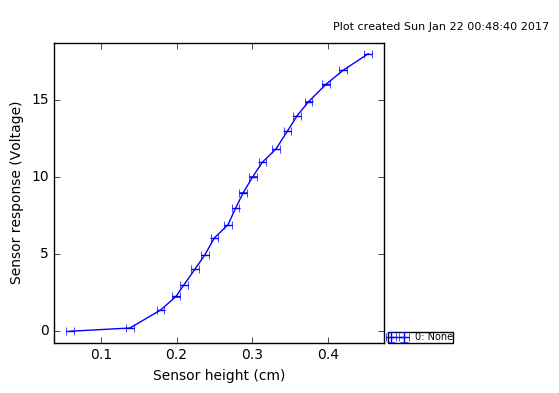

In [15]:
for i, calibration_data in enumerate(calibration_datas):
    fig = s.pylab.figure()
    ax = fig.add_axes([0,0,1,1])
    s.plot.xy.data(
        xdata=calibration_data[0], ydata=calibration_data[1],
        exdata=calibration_data[2], eydata=calibration_data[3],
        xlabel="Sensor height (cm)", ylabel="Sensor response (Voltage)")
    #s.pylab.savefig("calibration_curve"+str(i+1)+".pdf", bbox_inches='tight')

Try to overlap using polynomials:

Try to produce some linear fits:

In [61]:
def obtain_fit_results(calibration_data):
    chi_squares = []
    fits = []
    for start in range(0, 11):
        for length in range(3, len(calibration_data[0])-start):
            my_fitter = s.data.fitter(f='a*x + b', p='a, b')
            my_fitter._settings['autoplot'] = False
            length_of_regression = length
            start_of_regression = start
            end_of_regression = start_of_regression + length_of_regression
            my_fitter.set_data(
                xdata=calibration_data[0][start_of_regression:end_of_regression],
                ydata=calibration_data[1][start_of_regression:end_of_regression],
                exdata=calibration_data[2][start_of_regression:end_of_regression],
                eydata=calibration_data[3][start_of_regression:end_of_regression])
            my_fitter.fit()
            chi_squared = my_fitter.reduced_chi_squareds()[0]
            chi_squares.append([start, length, chi_squared])
            fits.append(my_fitter.results[0])
    return chi_squares, fits

In [62]:
all_fit_data = [obtain_fit_results(calibration_datas[i]) for i in range(3)]
chi_squares = [np.array(all_fit_data[i][0]) for i in range(3)]
best_fits = [np.argsort(np.abs(chi_squares[i][:, 2]-1)) for i in range(3)]
fit_params = [np.array(all_fit_data[i][1]) for i in range(3)]

In [95]:
for i in range(3):
    print("Curve", i)
    for j in range(10):
        print("Start, length, reduced chi-square:", fit_results[i][best_fits[i][j]])
        pass

Curve 0
Start, length, reduced chi-square: [   6.            3.          117.64611872]
Start, length, reduced chi-square: [   5.     3.   121.5]
Start, length, reduced chi-square: [   4.            4.          185.33898305]
Start, length, reduced chi-square: [   4.            5.          225.33697887]
Start, length, reduced chi-square: [   2.      3.    230.64]
Start, length, reduced chi-square: [   0.            3.          294.23518109]
Start, length, reduced chi-square: [   5.            4.          302.48170366]
Start, length, reduced chi-square: [   4.            7.          323.37672157]
Start, length, reduced chi-square: [   4.            6.          345.33029551]
Start, length, reduced chi-square: [   5.            5.          347.99141492]
Curve 1
Start, length, reduced chi-square: [ 10.           5.          20.96135609]
Start, length, reduced chi-square: [ 10.           4.          29.59417808]
Start, length, reduced chi-square: [  4.           3.          47.04054054]
Start

Try to increase a fake error to get realistic chi-squared values:

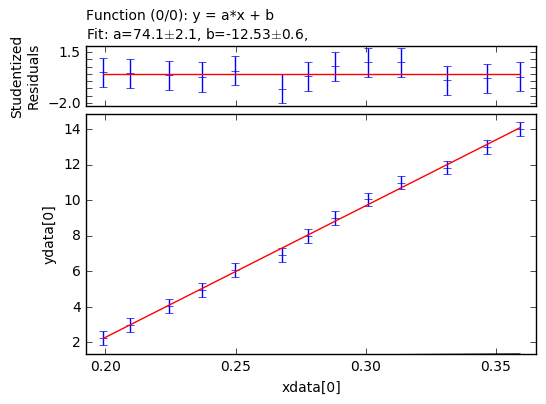

Voltage error: 0.381293344829
Chi^2: 0.279861224779


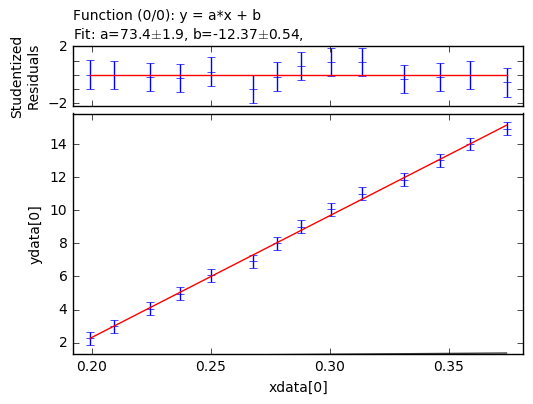

Voltage error: 0.378146352717
Chi^2: 0.29474452009


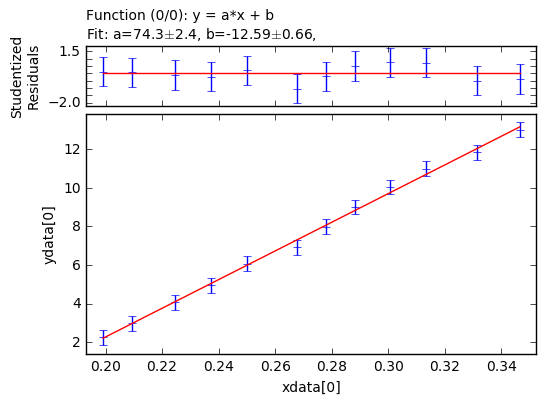

Voltage error: 0.382616197764
Chi^2: 0.30055365813


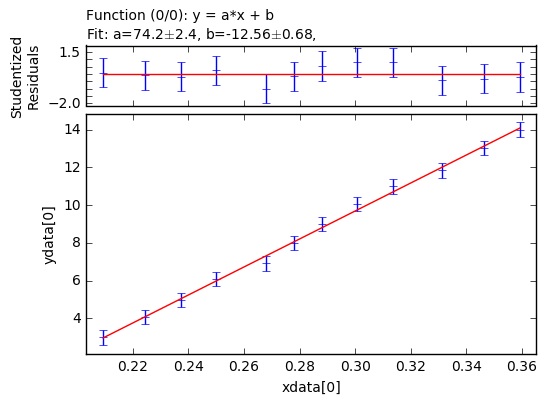

Voltage error: 0.381914532167
Chi^2: 0.305559326866


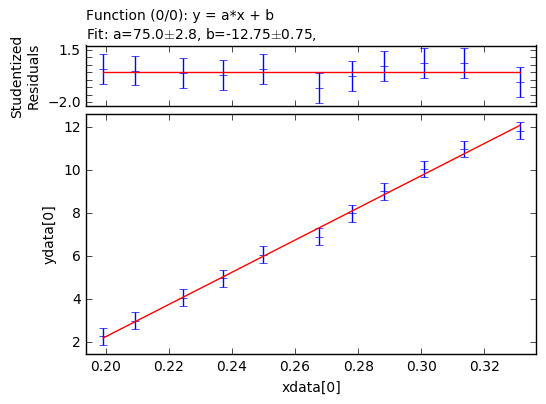

Voltage error: 0.385959540128
Chi^2: 0.304065693836


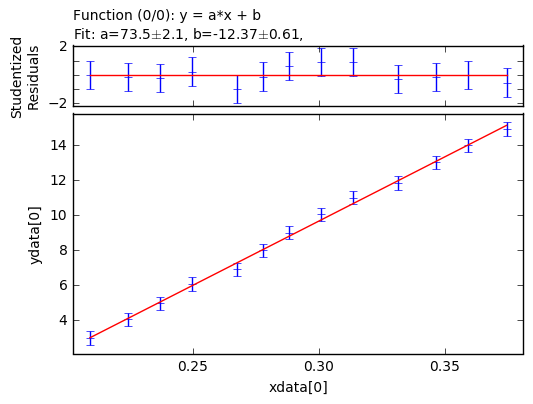

Voltage error: 0.378210349419
Chi^2: 0.32141298397


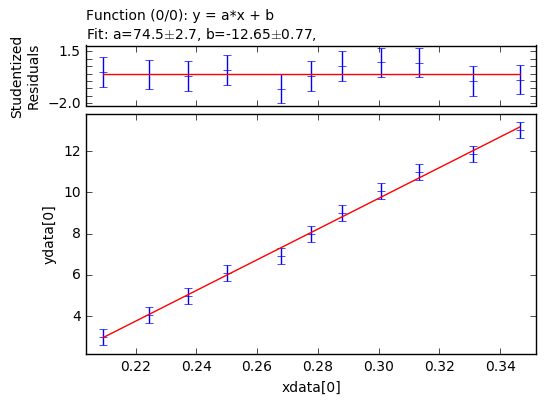

Voltage error: 0.383620427055
Chi^2: 0.329602743559


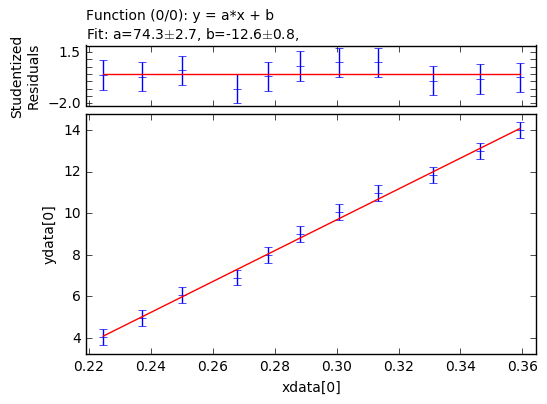

Voltage error: 0.382479868697
Chi^2: 0.337722755056


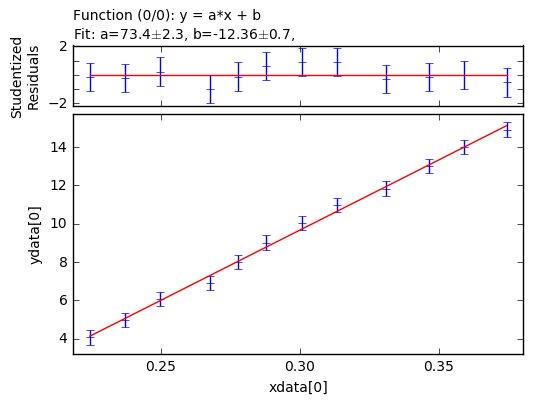

Voltage error: 0.378035430157
Chi^2: 0.353781357797


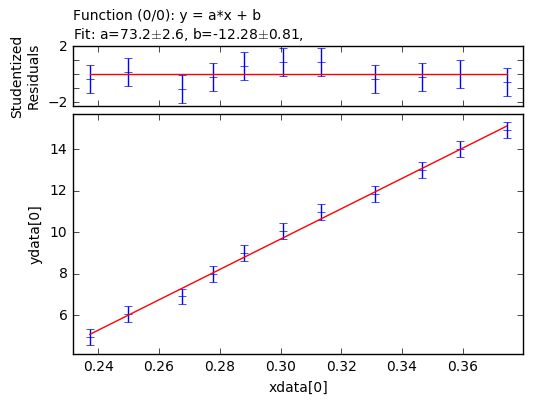

Voltage error: 0.376779259356
Chi^2: 0.391363994969


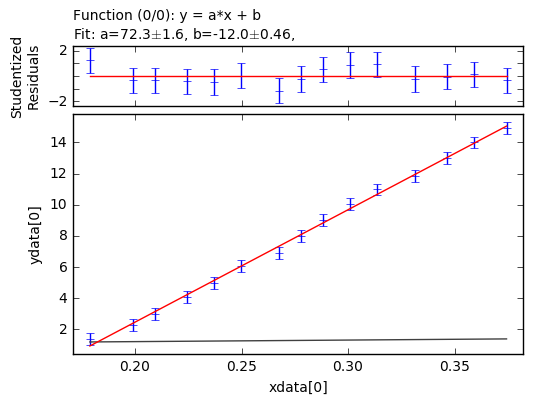

Voltage error: 0.372154500185
Chi^2: 0.438386962589


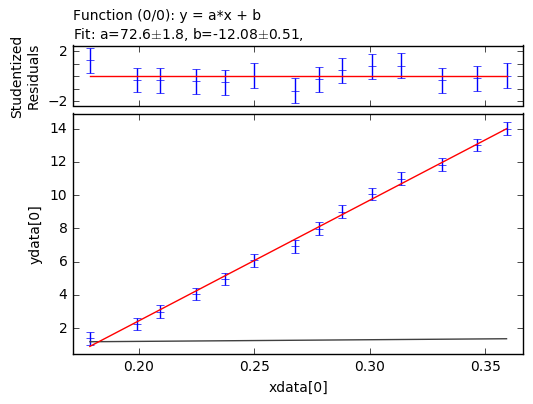

Voltage error: 0.373853025361
Chi^2: 0.45661095783


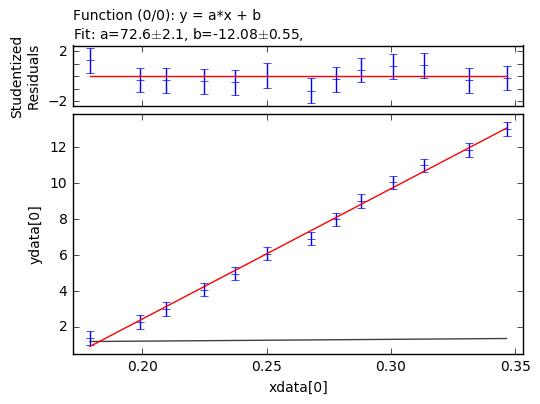

Voltage error: 0.373714768931
Chi^2: 0.498412842033


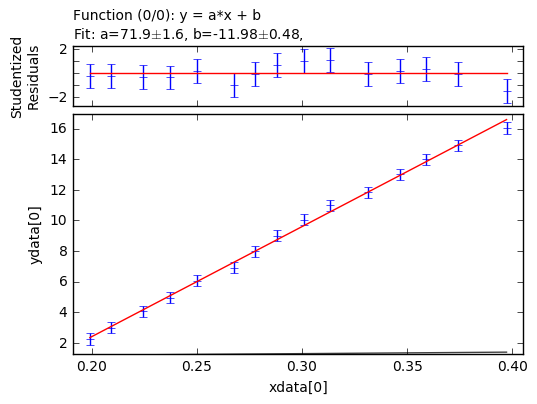

Voltage error: 0.370411558828
Chi^2: 0.520899992261


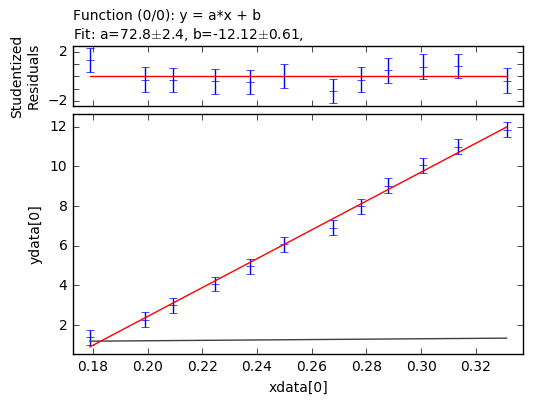

Voltage error: 0.374720061786
Chi^2: 0.542210581063


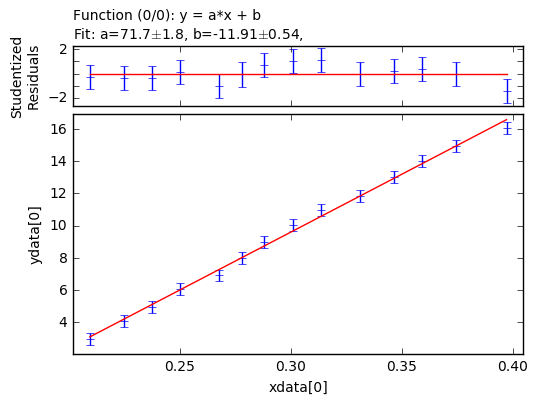

Voltage error: 0.369428237977
Chi^2: 0.561536646415


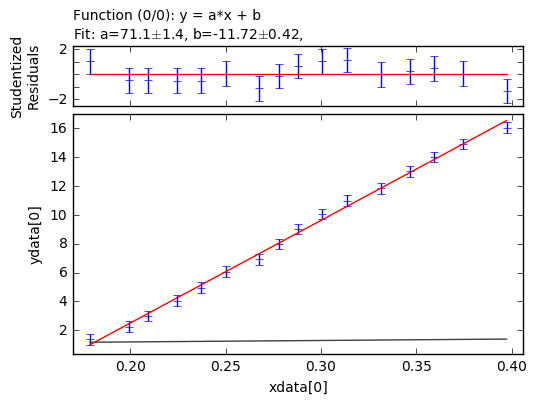

Voltage error: 0.366305738666
Chi^2: 0.594720157814


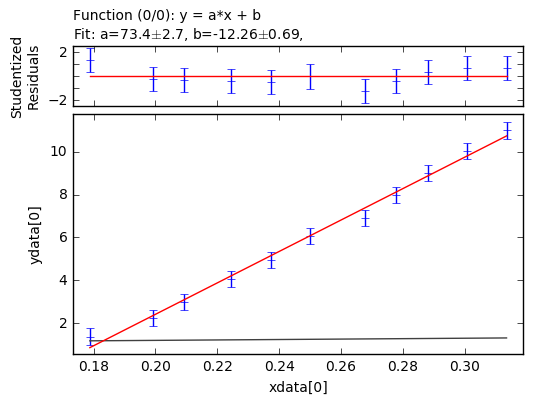

Voltage error: 0.377715073155
Chi^2: 0.571243252673


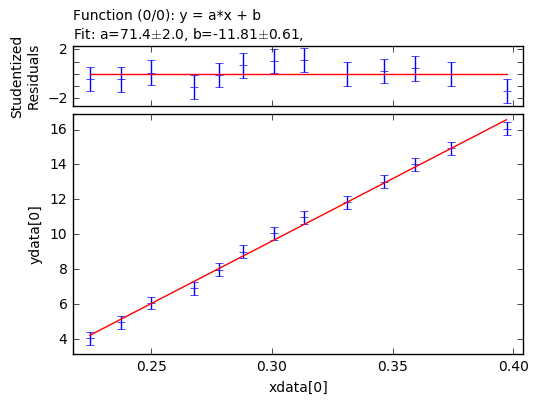

Voltage error: 0.367915552184
Chi^2: 0.606866445329


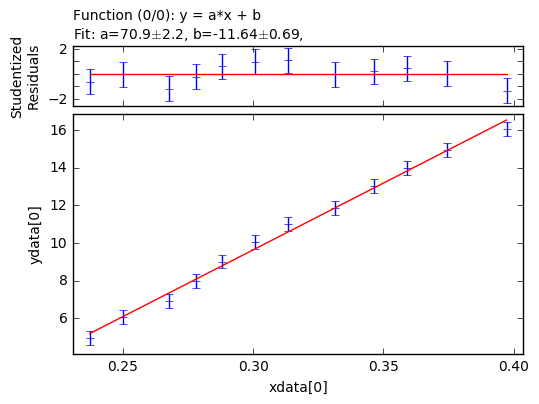

Voltage error: 0.365318971274
Chi^2: 0.649464916722


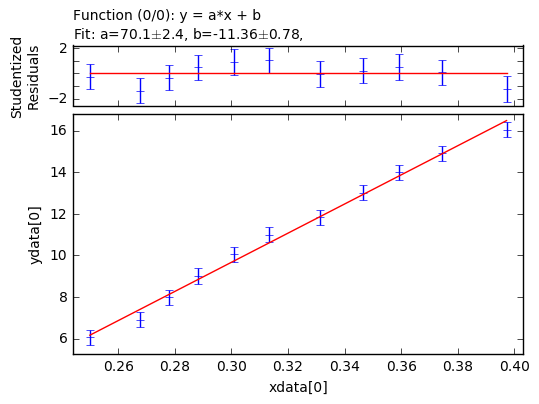

Voltage error: 0.361126449855
Chi^2: 0.679012824688


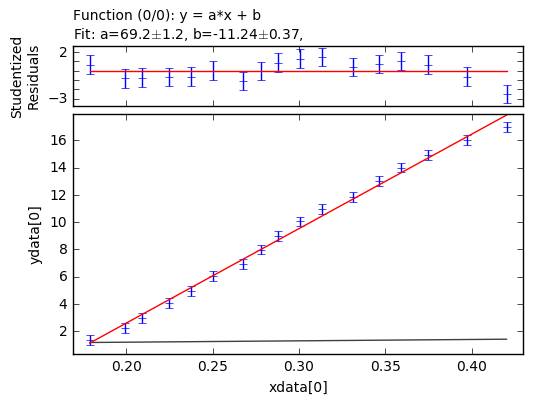

Voltage error: 0.356865134056
Chi^2: 1.14437748401


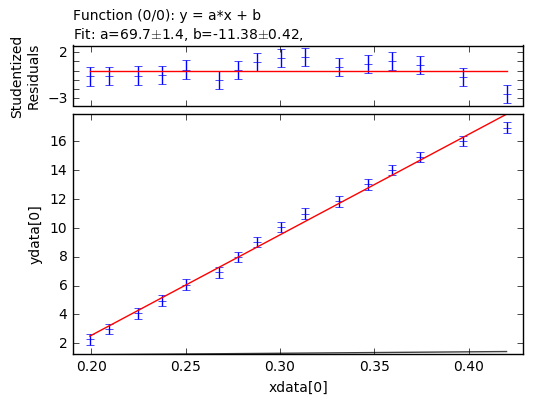

Voltage error: 0.359003985013
Chi^2: 1.17140479526


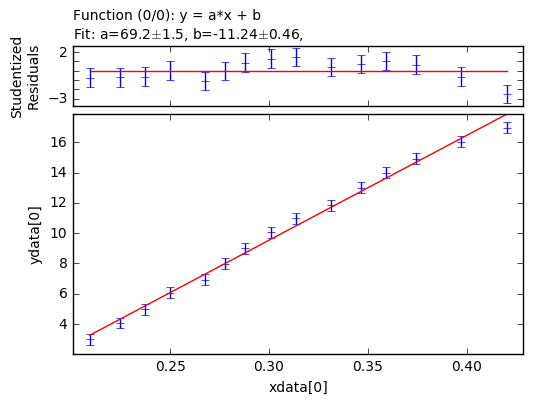

Voltage error: 0.356812525227
Chi^2: 1.23599688453


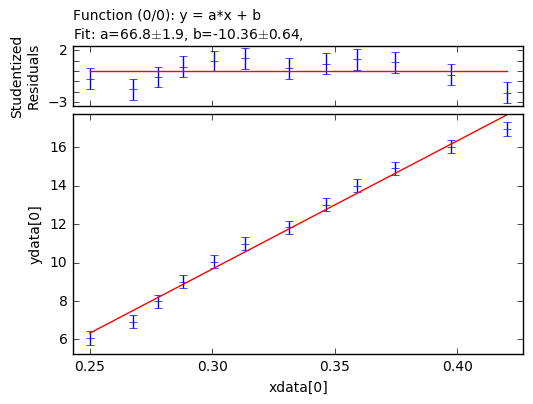

Voltage error: 0.344225686487
Chi^2: 1.36455107175


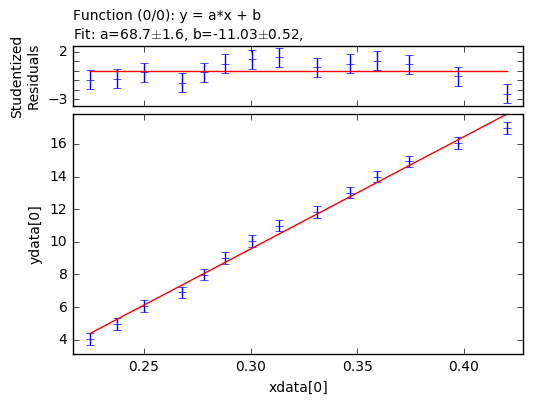

Voltage error: 0.353841878169
Chi^2: 1.29997666904


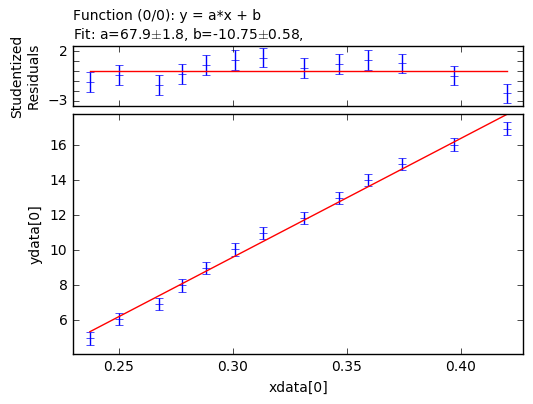

Voltage error: 0.349813868454
Chi^2: 1.34926448606


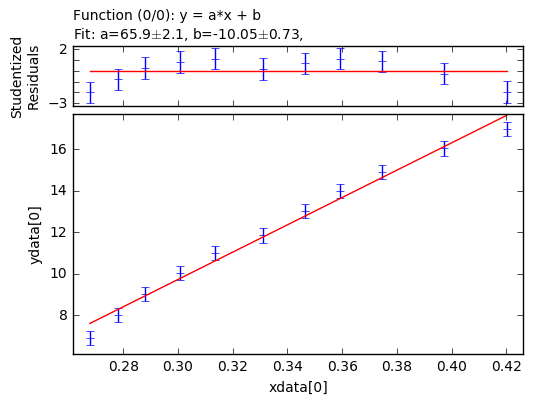

Voltage error: 0.339869578195
Chi^2: 1.46952680487


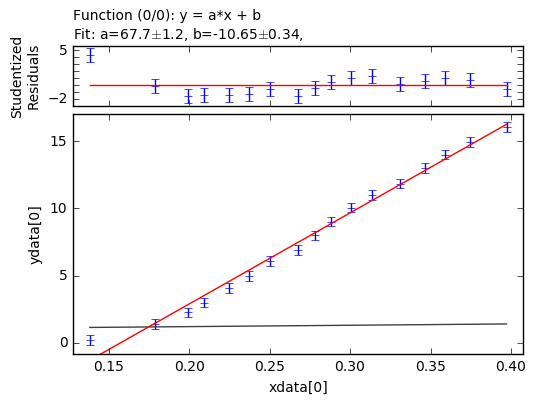

Voltage error: 0.349039701805
Chi^2: 2.34227576274


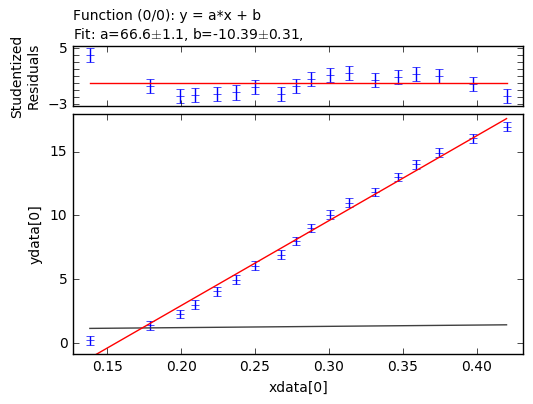

Voltage error: 0.343546054545
Chi^2: 2.54871183279


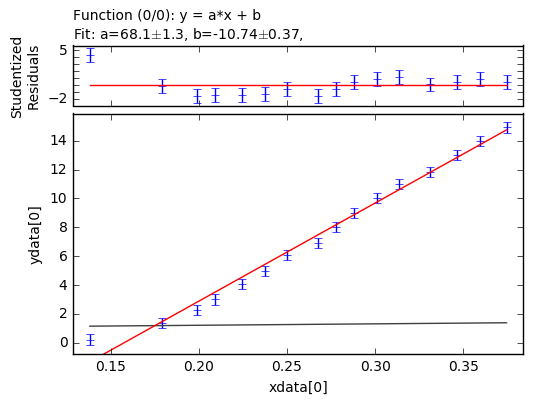

Voltage error: 0.350967269111
Chi^2: 2.45038008587


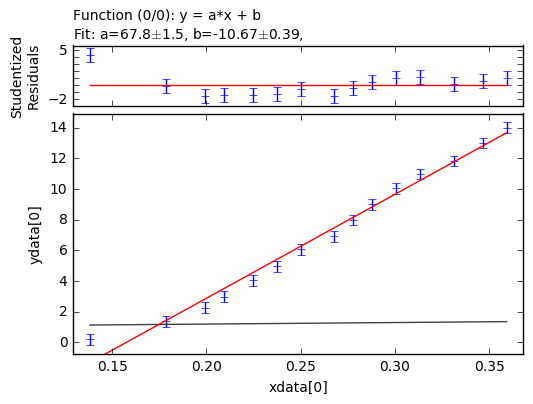

Voltage error: 0.349276317797
Chi^2: 2.64106982676


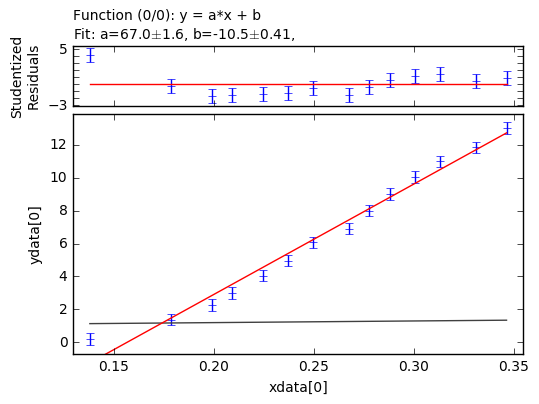

Voltage error: 0.345558112464
Chi^2: 2.82328242639


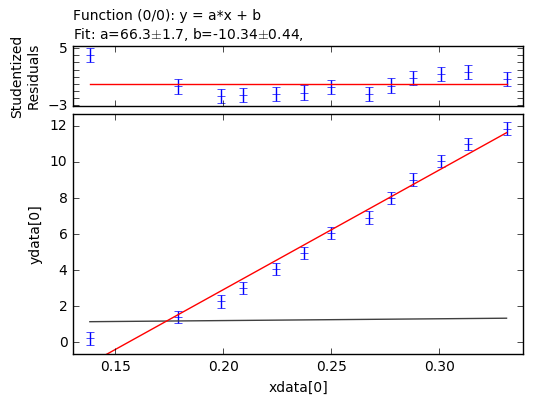

Voltage error: 0.341708455785
Chi^2: 3.06075256715


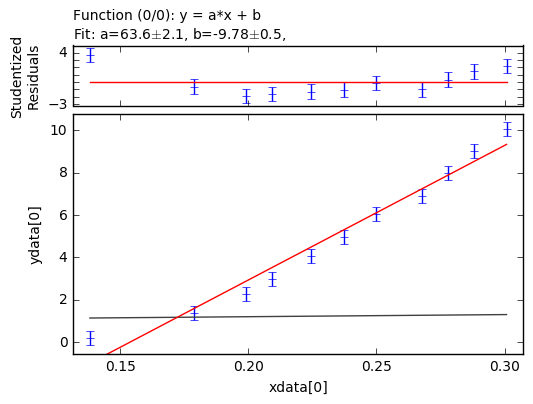

Voltage error: 0.328023148552
Chi^2: 3.4382255504


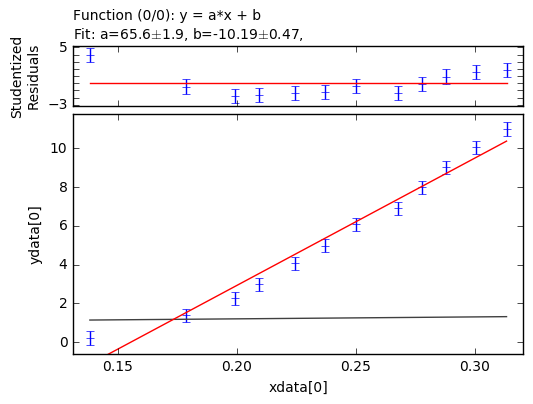

Voltage error: 0.338244290093
Chi^2: 3.37348497244


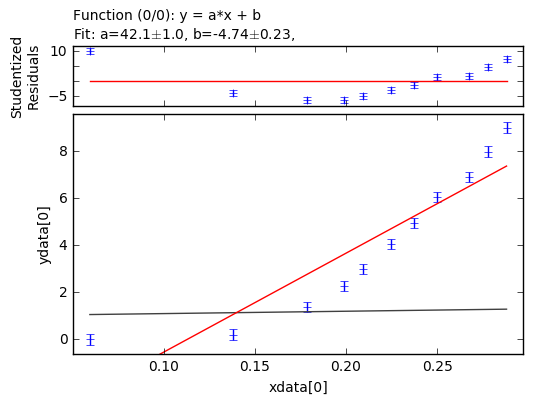

Voltage error: 0.218730298266
Chi^2: 35.4414202606


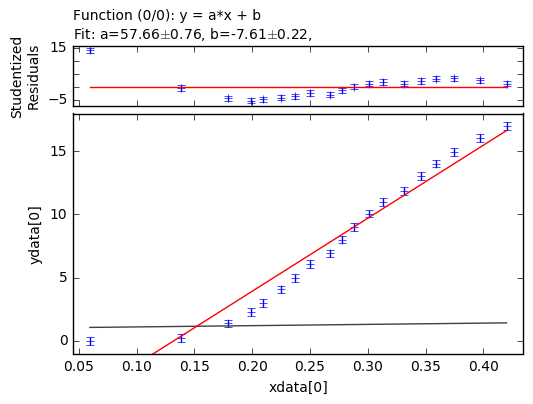

Voltage error: 0.297971389692
Chi^2: 21.0161325008


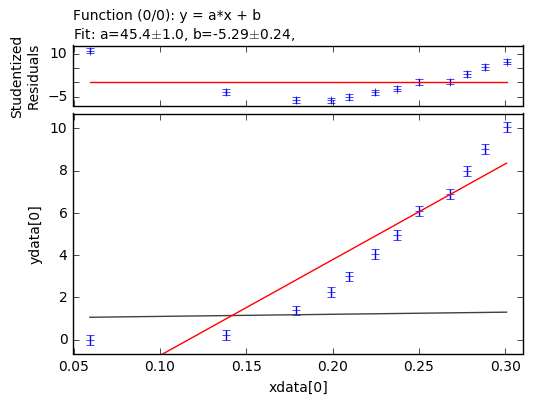

Voltage error: 0.23557017086
Chi^2: 34.0483092494


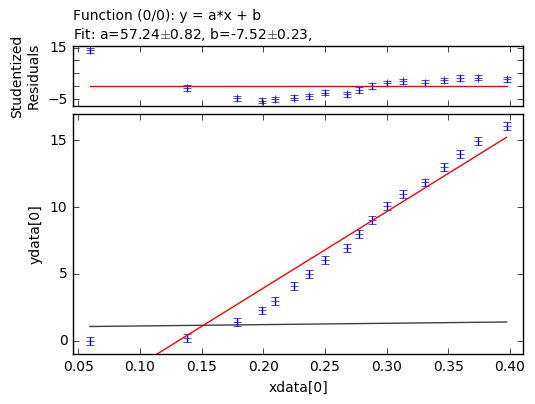

Voltage error: 0.295837921246
Chi^2: 22.5450183423


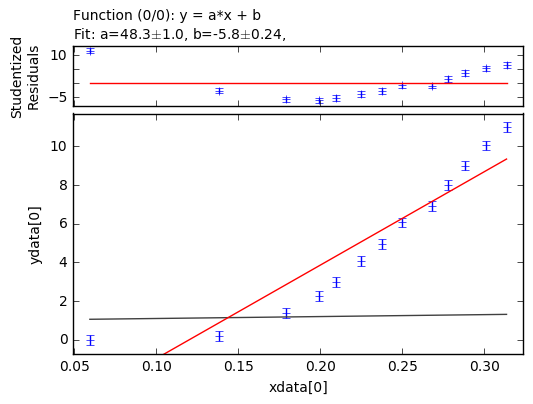

Voltage error: 0.250504049753
Chi^2: 32.2784529008


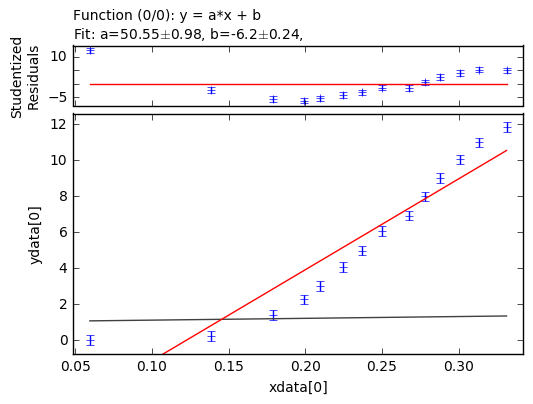

Voltage error: 0.261874003799
Chi^2: 29.6619582066


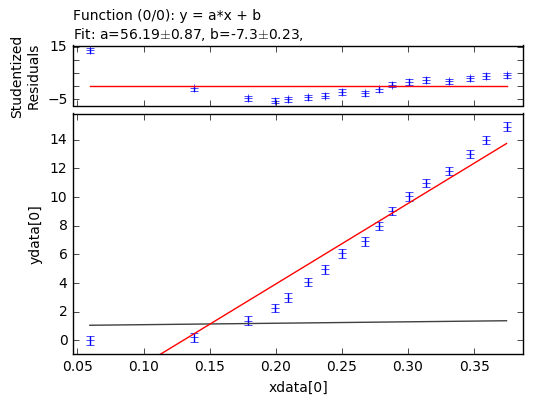

Voltage error: 0.290519388368
Chi^2: 24.2759044845


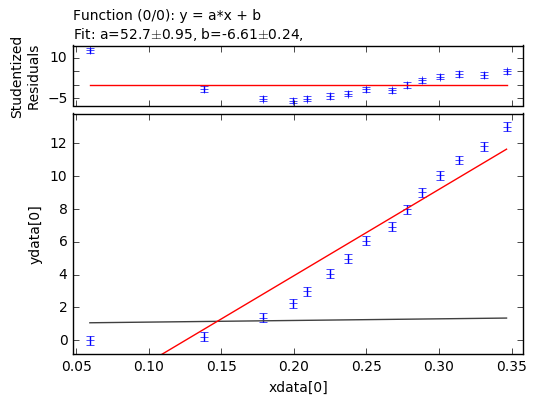

Voltage error: 0.272819089737
Chi^2: 27.6207004354


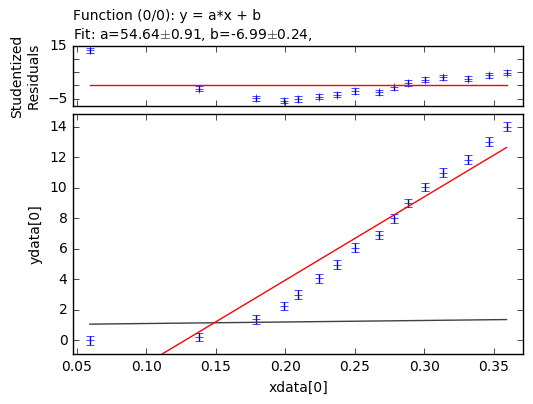

Voltage error: 0.282652751849
Chi^2: 25.9444864967


In [148]:
curve_number = 2
for i in range(len(best_fits[curve_number])):
    calibration_datas[curve_number][3][:] = 0.01
    current_slope = fit_params[curve_number][best_fits[curve_number][i]][0]
    
    #Add in errors from measurement
    temp_voltage_error = calibration_datas[curve_number][2]*(current_slope+1)
    calibration_datas[curve_number][3][:] = temp_voltage_error[:]
    
    
    my_fitter = s.data.fitter(f='a*x + b', p='a, b')
    my_fitter._settings['autoplot'] = False
    length_of_regression = fit_results[curve_number][best_fits[curve_number][i]][1]
    start_of_regression = fit_results[curve_number][best_fits[curve_number][i]][0]
    end_of_regression = start_of_regression + length_of_regression
    
    my_fitter.set_data(
        xdata=calibration_datas[curve_number][0][start_of_regression:end_of_regression],
        ydata=calibration_datas[curve_number][1][start_of_regression:end_of_regression],
        exdata=calibration_datas[curve_number][2][start_of_regression:end_of_regression],
        eydata=calibration_datas[curve_number][3][start_of_regression:end_of_regression])

    if length_of_regression > 10:
        my_fitter.fit()
        my_fitter.plot()
        print("Voltage error:", calibration_datas[curve_number][3][0])
        print("Chi^2:", my_fitter.reduced_chi_squareds()[0])
    calibration_datas[curve_number][3][:] = 0.01

In [149]:
calibration_datas[2][3][:]

array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
        0.01,  0.01])